In [ ]:
# Dataset: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# ABOUT DATASET(From Kaggle):-
# -----------------------------------------------------------------------
# | Key Name	        | Description                                        |
# |---------------------------------------------------------------------|
# | Loan_ID	          | Unique Loan ID                                  |
# | Gender	          | Male/ Female                                    |
# | Married	          | Applicant married (Y/N)                         |
# | Dependents	      | Number of dependents                            |
# | Education	        | Applicant Education (Graduate/ Under Graduate)  |
# | Self_Employed	    | Self-employed (Y/N)                             |
# | ApplicantIncome   | Applicant income                                |
# | CoapplicantIncome	| Coapplicant income                              |
# | LoanAmount	      | Loan amount in thousands                        |
# | Loan_Amount_Term	| Term of a loan in months                        |
# | Credit_History	  | credit history meets guidelines                 |
# | Property_Area	    | Urban/ Semi-Urban/ Rural                        |
# | Loan_Status	      | Loan approved (Y/N)                             |
# -----------------------------------------------------------------------

In [3]:
train_df = pd.read_csv('loan_train.csv')
test_df = pd.read_csv('loan_test.csv')

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# rows and cols in train_df
print('rows:', train_df.shape[0])
print('cols:', train_df.shape[1])

rows: 614
cols: 13


### **Data Exploration & Analysis**
**Categorical Variables**


In [7]:
# 1. Gender
train_df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

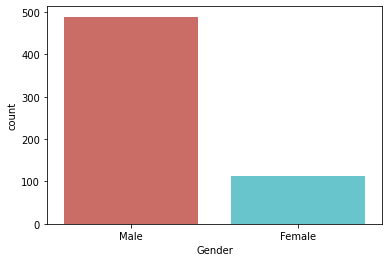

In [8]:
sns.countplot(x="Gender", data=train_df, palette="hls")
plt.show()

In [9]:
# 2. Married
train_df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

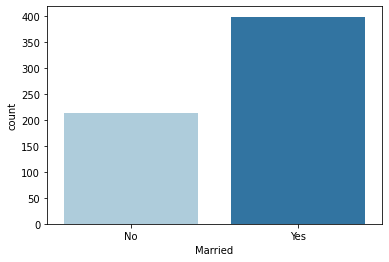

In [10]:
sns.countplot(x="Married", data=train_df, palette="Paired")
plt.show()

In [11]:
# 3. Education
train_df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

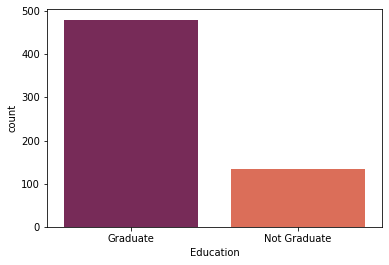

In [12]:
sns.countplot(x="Education", data=train_df, palette="rocket")
plt.show()

In [13]:
# 4. Self_Employed
train_df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

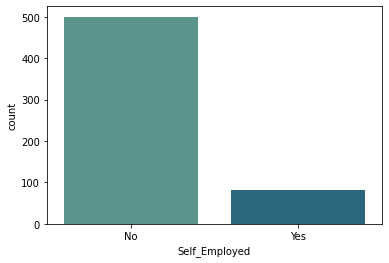

In [14]:
sns.countplot(x="Self_Employed", data=train_df, palette="crest")
plt.show()

In [15]:
# 5. Credit_History
train_df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

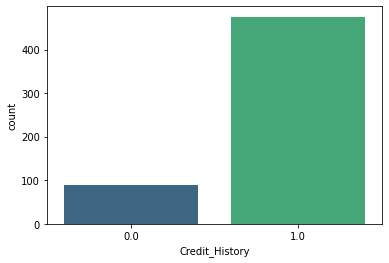

In [16]:
sns.countplot(x="Credit_History", data=train_df, palette="viridis")
plt.show()

In [17]:
# 6. Property_Area
train_df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

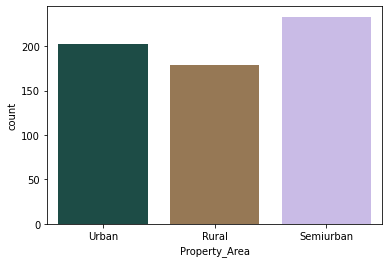

In [18]:
sns.countplot(x="Property_Area", data=train_df, palette="cubehelix")
plt.show()

In [19]:
# 7. Loan_Status
train_df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

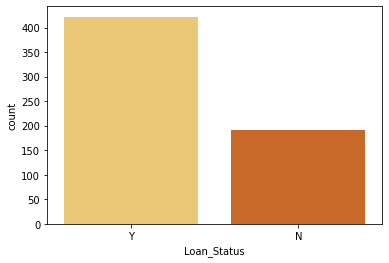

In [20]:
sns.countplot(x="Loan_Status", data=train_df, palette="YlOrBr")
plt.show()

In [21]:
# 8. Loan_Amount_Term
train_df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

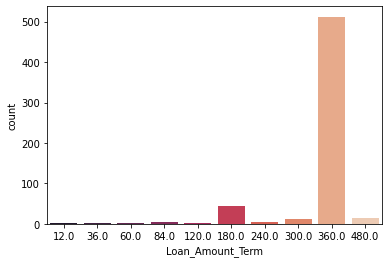

In [22]:
sns.countplot(x="Loan_Amount_Term", data=train_df, palette="rocket")
plt.show()

**Numerical Variables**

In [23]:
train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


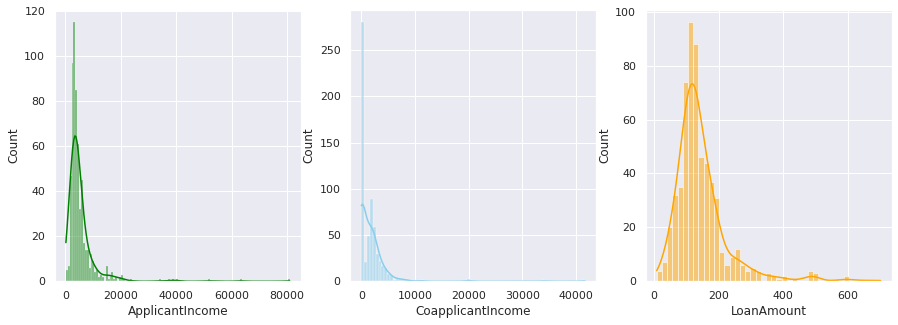

In [24]:
# Distribution
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=train_df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=train_df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=train_df, x="LoanAmount", kde=True, ax=axs[2], color='orange');

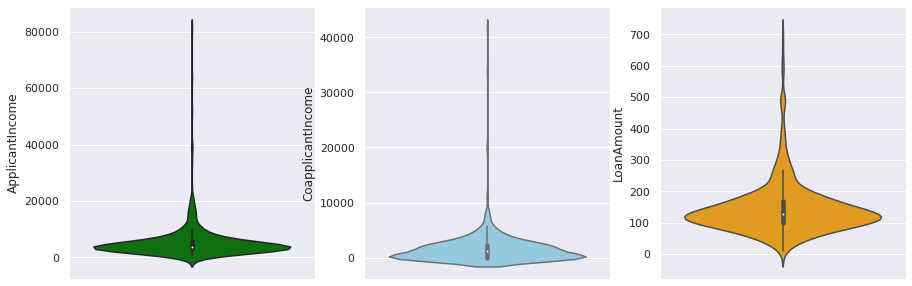

In [25]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(data=train_df, y="ApplicantIncome", ax=axs1[0], color='green')
sns.violinplot(data=train_df, y="CoapplicantIncome", ax=axs1[1], color='skyblue')
sns.violinplot(data=train_df, y="LoanAmount", ax=axs1[2], color='orange');

In [26]:
# The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and 
# it has outliers (can be seen from both histogram and violin plot).

# The distribution of Loan Amount Term is negativly skewed and it has outliers.

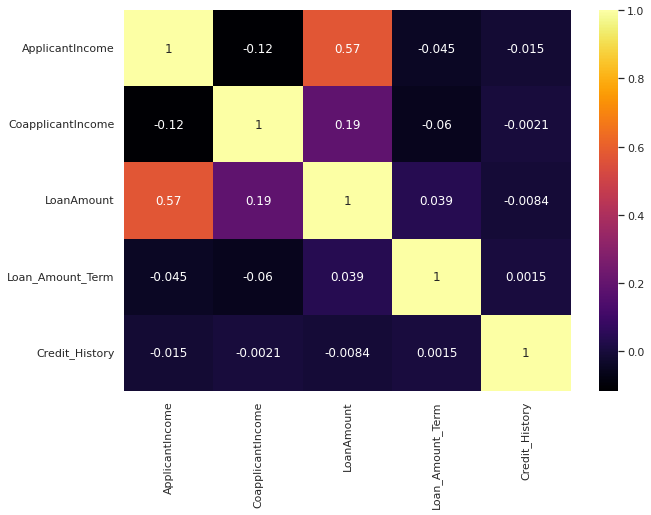

In [27]:
# Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(train_df.corr(), annot=True, cmap='inferno');

In [28]:
# There is positive correlation between Loan Amount and Applicant Income

In [29]:
# Lets Do some data pre-processing
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
train_df = train_df.drop(['Loan_ID'], axis = 1)

In [31]:
# Data Imputation:
# Imputation is a technique for substituting an estimated value for missing 
# values in a dataset. In this section, the imputation will be performed for 
# variables that have missing values.

## Categorical Variables
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

## Numerical Variables
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(),inplace=True)

In [32]:
# Categorical -> Numerical
train_df.Loan_Status = train_df.Loan_Status.replace({"Y": 1, "N" : 0})
train_df.Gender = train_df.Gender.replace({"Male": 1, "Female" : 0})
train_df.Married = train_df.Married.replace({"Yes": 1, "No" : 0})
train_df.Self_Employed = train_df.Self_Employed.replace({"Yes": 1, "No" : 0})
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mean(), inplace=True)

In [33]:
# Here, 'Property_Area', 'Dependents' and 'Education' has multiple values so now we 
# can use LabelEncoder from sklearn package

feature_col = ['Property_Area', 'Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    train_df[col] = le.fit_transform(train_df[col])

In [34]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


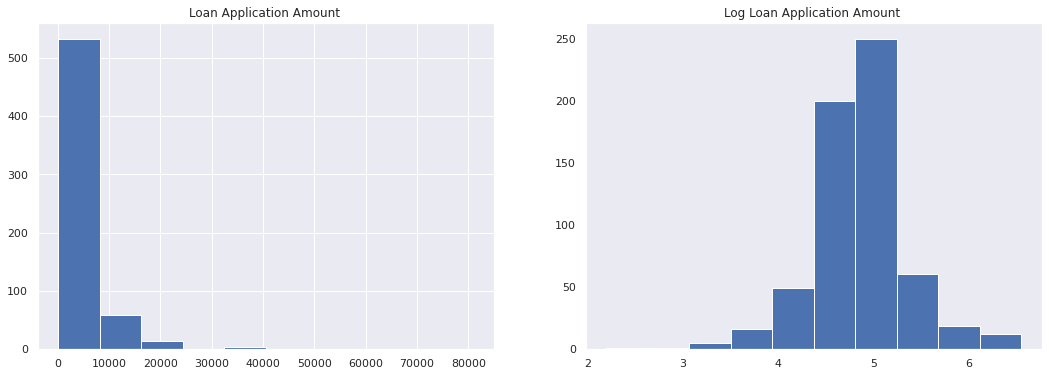

In [35]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


train_df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(train_df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

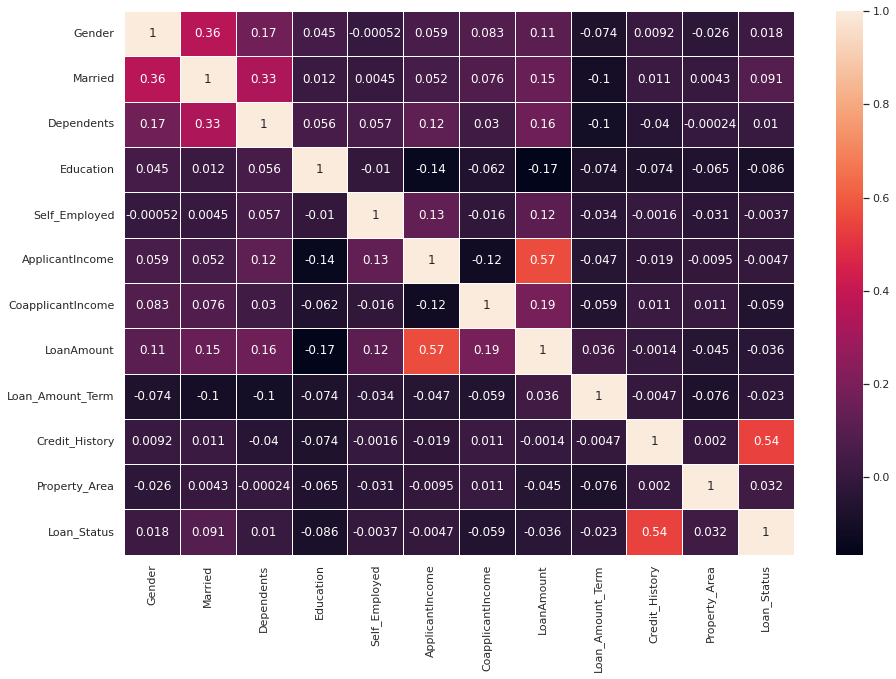

In [36]:
# A bigger Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), annot=True, linewidths=.8)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

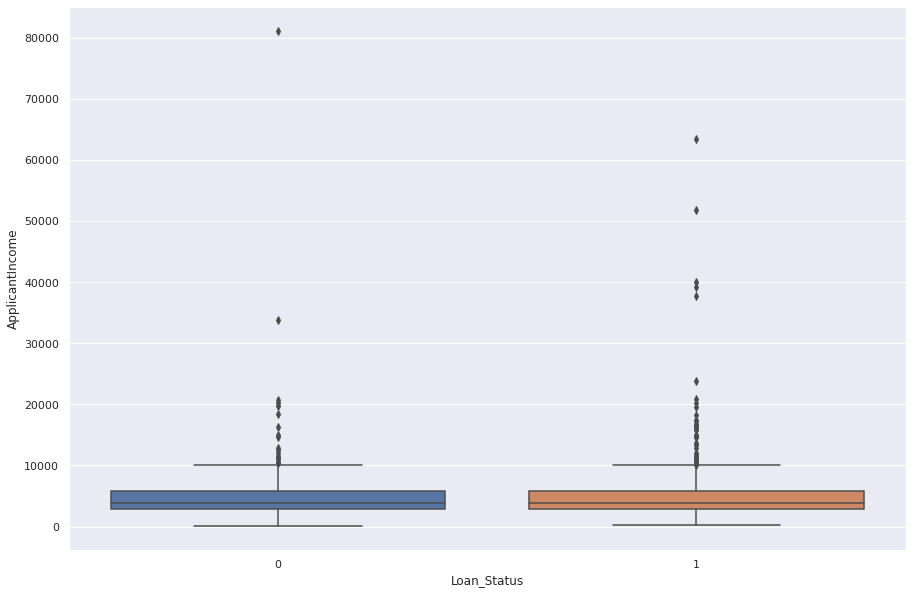

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=train_df)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

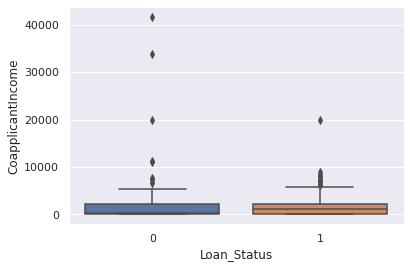

In [38]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=train_df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

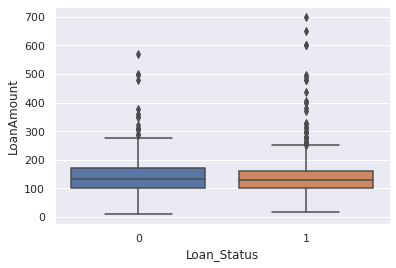

In [39]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=train_df)

In [40]:
# WE WILL NOT REMOVE THE
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

k_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).sum())
print(len(k_df))

# RESULT
# ApplicantIncome       50
# CoapplicantIncome     18
# LoanAmount            41

Gender               112
Married                0
Dependents            51
Education            134
Self_Employed         82
ApplicantIncome       50
CoapplicantIncome     18
LoanAmount            41
Loan_Amount_Term      88
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64
207


In [41]:
import pandas as pd

def remove_outliers(df,columns, n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

req_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
k1_df = remove_outliers(train_df, req_cols, 3)
print(len(k1_df))

Working on column: ApplicantIncome
Working on column: CoapplicantIncome
Working on column: LoanAmount
587


In [42]:
# Features Separating for model training

X = train_df.drop(["Loan_Status"], axis=1)
y = train_df["Loan_Status"]
# X = k1_df.drop(["Loan_Status"], axis=1)
# y = k1_df["Loan_Status"]

In [43]:
# # SMOTE Technique 
# X, y = SMOTE().fit_resample(X, y)

# sns.set_theme(style="darkgrid")
# sns.countplot(y=y, data=df, palette="coolwarm")
# plt.ylabel('Loan Status')
# plt.xlabel('Total')
# plt.show()

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind




from imblearn.over_sampling import SMOTE




from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
# # SMOTE Technique
# X, y = SMOTE().fit_resample(X, y)

# sns.set_theme(style="darkgrid")
# sns.countplot(y=y, data=train_df)
# plt.ylabel('Loan Status')
# plt.xlabel('Total')
# plt.show()

In [47]:
# Data Normalization
X = MinMaxScaler().fit_transform(X)

In [48]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### **ML MODELS**

In [49]:
# Logistic Regression
lr_classifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
lr_classifier.fit(X_train, y_train)

y_pred = lr_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LRAcc = accuracy_score(y_pred, y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.48      0.61        29
           1       0.86      0.97      0.91        94

    accuracy                           0.85       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.85      0.85      0.84       123

[[14 15]
 [ 3 91]]
LR accuracy: 85.37%


In [50]:
# Predict the probability of class 1 on the testing data
y_pred_proba = lr_classifier.predict_proba(X_test)

# Convert probabilities to class predictions
# y_pred = np.argmin(y_pred_proba, axis=1)
# y_pred

# Apply threshold to convert probabilities to binary labels
# y_pred_binary = (y_pred_proba[:, 1] >= 0.5).astype(int)
# y_pred_binary
# # Define a list of probability thresholds to use
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Loop over the thresholds and print statistics for each
for threshold in thresholds:
    print('threshold', threshold)
    y_pred = []
    for i in y_pred_proba:
      if i[0] > threshold:
        y_pred.append(0)
      else:
        y_pred.append(1)

    y_pred = np.array(y_pred)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    LRAcc = accuracy_score(y_pred, y_test)
    print('LR accuracy: {:.2f}%'.format(LRAcc*100))

threshold 0.2
              precision    recall  f1-score   support

           0       0.30      0.83      0.44        29
           1       0.88      0.39      0.54        94

    accuracy                           0.50       123
   macro avg       0.59      0.61      0.49       123
weighted avg       0.74      0.50      0.52       123

[[24  5]
 [57 37]]
LR accuracy: 49.59%
threshold 0.3
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        29
           1       0.84      0.85      0.85        94

    accuracy                           0.76       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.76      0.76      0.76       123

[[14 15]
 [14 80]]
LR accuracy: 76.42%
threshold 0.4
              precision    recall  f1-score   support

           0       0.82      0.48      0.61        29
           1       0.86      0.97      0.91        94

    accuracy                           0.85       123
   macro

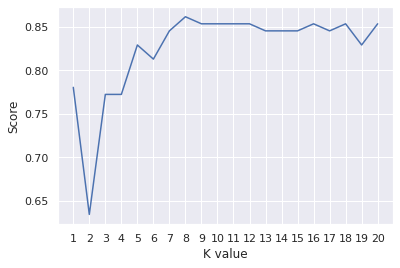

KNN best accuracy: 86.18%


In [51]:
# K-Nearest Neighbour (KNN)
scoreListknn = []
for i in range(1, 21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [52]:
# Support Vector Machine (SVM)
SVCclassifier = SVC(kernel='rbf', max_iter=1000)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.48      0.61        29
           1       0.86      0.97      0.91        94

    accuracy                           0.85       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.85      0.85      0.84       123

[[14 15]
 [ 3 91]]
SVC accuracy: 85.37%


In [53]:
# # Naive Bayes

# ## 1. Categorical NB

# NBclassifier1 = CategoricalNB()
# NBclassifier1.fit(X_train, y_train)

# y_pred = NBclassifier1.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# NBAcc1 = accuracy_score(y_pred,y_test)
# print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

In [54]:
## 2. Gaussian NB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56        29
           1       0.86      0.89      0.88        94

    accuracy                           0.80       123
   macro avg       0.73      0.71      0.72       123
weighted avg       0.80      0.80      0.80       123

[[15 14]
 [10 84]]
Gaussian Naive Bayes accuracy: 80.49%


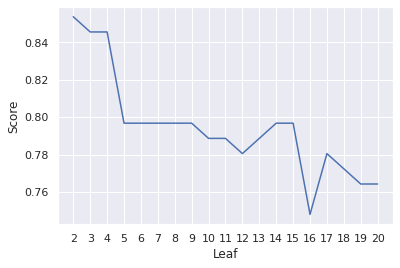

Decision Tree Accuracy: 85.37%


In [55]:
# Decision Tree
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

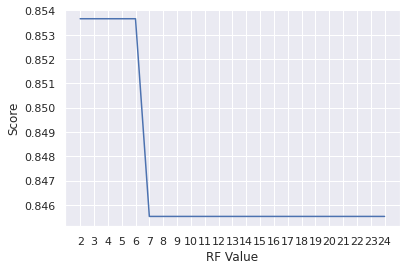

Random Forest Accuracy:  85.37%


In [56]:
#  Random Forest
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [62]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=100, max_depth=10, max_leaf_nodes=20)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49        29
           1       0.84      0.85      0.85        94

    accuracy                           0.76       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.76      0.76      0.76       123

[[14 15]
 [14 80]]
Gradient Boosting accuracy: 76.42%


In [63]:
# Model Comparison
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,86.178862
0,Logistic Regression,85.365854
2,SVM,85.365854
4,Decision Tree,85.365854
5,Random Forest,85.365854
3,Gaussian NB,80.487805
6,Gradient Boost,76.422764


In [64]:
len(train_df)

614